**Assignment**

1.	Build a **Property Price Prediction Model**. Please use the Python programming language.

>a.	Explore the dataset, and share with us any insights that you may find which can help you create the price evaluation tool. Please summarise your findings in terms of the relationship between the different features, the price, and feature importance.

>b.	Build a model which predicts the listing price of the property based on the property’s features

>>i.	Model Input: Features of property

>>ii.	Model Output: Predicted Price

>c.	How do you evaluate the quality of your results? 

>d.	What are the possible shortcoming & extensions of your approach?



# **1. Data Preparation**


In [2]:
# Importing the Python Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from time import time

In [3]:
# Loading csv data using pandas

df = pd.read_csv('data_science_challenge_data.csv')
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
neighbourhood,67107,3,ZMS,35833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,67107.0,NaN,NaN,NaN,219911.781497,5882341.621316,22000.0,99000.0,130000.0,165000.0,565352964.0
size,67107.0,NaN,NaN,NaN,1621.59304,9049.480663,-755.0,840.0,1200.0,1637.0,1170000.0
bedrooms,67107.0,NaN,NaN,NaN,1.654969,1.008304,0.0,1.0,2.0,2.0,12.0
bathrooms,63657.0,NaN,NaN,NaN,2.403066,1.077319,1.0,2.0,2.0,3.0,12.0
building,61068,353,Building_101,1672,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67107 entries, 0 to 67106
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  67107 non-null  object 
 1   price          67107 non-null  float64
 2   size           67107 non-null  float64
 3   bedrooms       67107 non-null  int64  
 4   bathrooms      63657 non-null  float64
 5   building       61068 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.1+ MB


#### **Initial Analysis**: 


*  Dataset 
>*   size : 67107 rows, 6 columns
>*  Numerical columns - 4 nos [price, size, bedrooms, bathrooms]
>*  Categorical columns - 2 nos [neighbourhood, building]
* Minimum value of column 'size' is -755, which is practically not a valid value
*  Columns 'building' and 'bathrooms' have missing values.

#### **Finding and removing duplicates**: 

In [5]:
def find_duplicates(df):
  """Checks duplicate rows and removes it from the dataframe
  Args:
  df: Dataframe to check duplicates

  Returns:
  df: Dataframe without duplicates
  """

  len_dupe_rows = df[df.duplicated()].shape[0]
  print(len_dupe_rows, " duplicate rows present")
  if(len_dupe_rows > 0):
    df.drop_duplicates(inplace=True)
    print("Removed all duplicate rows")
  return df

In [6]:
df = find_duplicates(df)

27099  duplicate rows present
Removed all duplicate rows


#### **Handling outliers and noise**: 

Skewness of data
 price        74.019004
size         65.173018
bedrooms      0.421233
bathrooms     0.762551
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


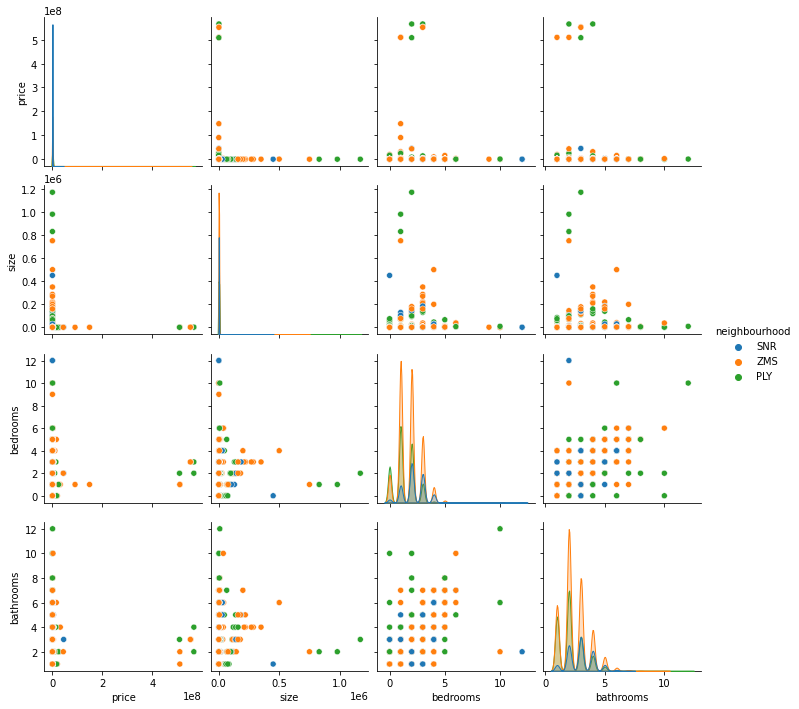

In [7]:
# Finding assymetry in data

print("Skewness of data\n", df.skew())
sns.pairplot(data=df, hue='neighbourhood')

In [8]:
# Removing outliers in data

def outliers(df, feature, percentile):
    """Removes outliers in the feature/column passed.
    Plots boxplot for before/after outliers in the feature.
    
    Args:
    df: Dataframe
    feature: Column to check for outliers
    percentile: A list with lower and upper percentiles for outlier removal
    
    Returns:
    df: Dataframe without outliers
    """

    fig, axes = plt.subplots(1, 2)
    sns.boxplot(data=df[feature], ax=axes[0])

    Q1, Q3= df[feature].quantile(percentile)
    ## drop outliers
    index = df[(df[feature] > Q3) | (df[feature] <= Q1)].index
    df.drop(index, inplace = True)
    sns.boxplot(data=df[feature], ax=axes[1])
    plt.show()

    return Q1, Q3


-------------------Price-------------------


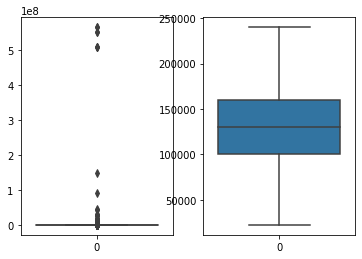

Lower Whisker:  22000.0
Upper whisker:  240000.0

-------------------Size-------------------


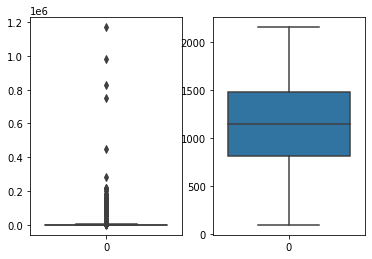

Lower Whisker:  95.53750000000001
Upper whisker:  2152.0

-------------------bathroom-------------------


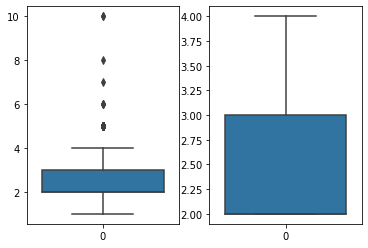

Lower Whisker:  1.0
Upper whisker:  4.0

-------------------bedrooms-------------------


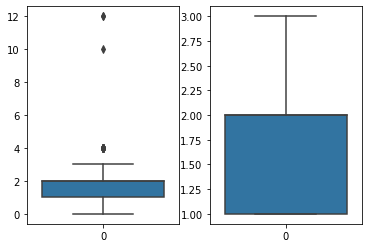

Lower Whisker:  0.0
Upper whisker:  3.0

-------------------Price per unit size-------------------


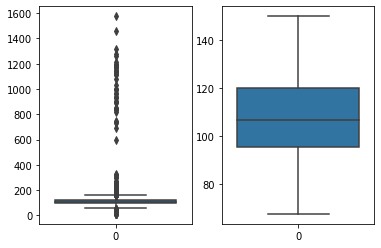

Lower Whisker:  67.47361107142856
Upper whisker:  150.0


In [9]:
print("\n-------------------Price-------------------")
percentile = [0.0002, 0.92]
lower_price, upper_price = outliers(df, "price", percentile)
print("Lower Whisker: ", lower_price)
print("Upper whisker: ", upper_price)

print("\n-------------------Size-------------------")
percentile = [0.0025, 0.93]
lower_size, upper_size = outliers(df, "size", percentile)
print("Lower Whisker: ", lower_size)
print("Upper whisker: ", upper_size)

print("\n-------------------bathroom-------------------")
percentile = [0.0001, 0.93]
lower_bath, upper_bath = outliers(df, "bathrooms", percentile)
print("Lower Whisker: ", lower_bath)
print("Upper whisker: ", upper_bath)

print("\n-------------------bedrooms-------------------")
percentile = [0.0025, 0.93]
lower_bed, upper_bed = outliers(df, "bedrooms", percentile)
print("Lower Whisker: ", lower_bed)
print("Upper whisker: ", upper_bed)

# Creating new column 'price per unit size' from columns 'price' and 'size'
print("\n-------------------Price per unit size-------------------")
df['price_per_unit'] = np.array(df["price"].div(df["size"].values), dtype=float)

percentile = [0.005, 0.95]
lower_price_perunit, upper_price_perunit = outliers(df, "price_per_unit", percentile)
print("Lower Whisker: ", lower_price_perunit)
print("Upper whisker: ", upper_price_perunit)

In [10]:
print("-------Skewness of data after removing outliers---------\n", df.skew())

-------Skewness of data after removing outliers---------
 price             0.445585
size              0.220657
bedrooms          0.273585
bathrooms         0.817832
price_per_unit    0.226015
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


#### **Handling missing values**: 
Finding how many values are missing in this dataset per column


In [11]:
# Plotting how many null values are present in each column
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i], ha="center")

def check_null_values(df):
    null_values_present = df.isnull().sum()
    columns_present = null_values_present.index.tolist()
    null_values = null_values_present.values

    plt.figure(figsize=(8,6))
    plt.bar(columns_present,null_values )
    add_value_label(columns_present,null_values)
    plt.title("Missing values present in dataset")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.show()

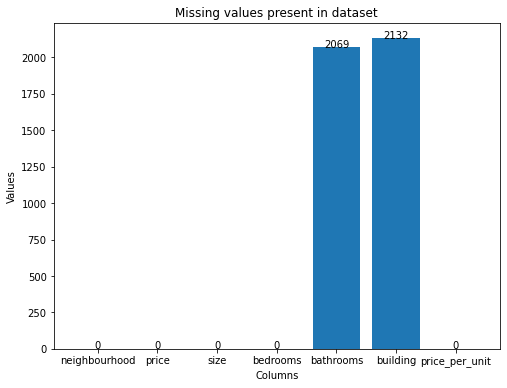

In [12]:
check_null_values(df)

Here, columns bathrooms and buildings have null values. 

***Assumption***

1. Here for column 'bathrooms', four cases are present

> *  No. of bathrooms = No. of bedrooms
> *  No. of bathrooms = No. of bedrooms + 1
> *  Missing values
> *  Others

>Replace missing bathroom values with one of the above case by checking most suitable strategy for our dataset. 

2. For column 'building', remove string from values and replace missing values with most frequent value.


In [13]:
# Checking relation between number of bedrooms and bathrooms
def missing_bathroom(df):
  """Finds how to fill number of bathrooms in a property
  
  Args:
  df: Dataframe
  
  Returns:
  best_fill_option: which method is better for this dataset
  
  """

  equal_bedroom_bathroom = df.loc[(df['bathrooms'] == df['bedrooms'])].shape[0]       # Checking no.s of rows with same no. of bedrooms and bathrooms
  bed_plus_one = df.loc[(df['bathrooms'] == df['bedrooms'] + 1)].shape[0]
  no_bathroom_missing = df.isnull().sum()['bathrooms']

  print("No. of missing rows in bathrooms column \t", no_bathroom_missing) 
  total_without_missing_rows = df.shape[0] - no_bathroom_missing

  print("No. of rows with same no. of bedrooms and bathrooms \t", equal_bedroom_bathroom)
  print("No. of rows with bathrooms = bedrooms+1 \t", bed_plus_one)

  bathroom_options = ['equal_bedroom_bathroom', 'bed_plus_one', 'others']
  count_bathroom = [equal_bedroom_bathroom, bed_plus_one,  df.shape[0] - (equal_bedroom_bathroom + bed_plus_one + no_bathroom_missing)]
  percent_bathroom = [equal_bedroom_bathroom/total_without_missing_rows*100, bed_plus_one/total_without_missing_rows*100, (total_without_missing_rows-(equal_bedroom_bathroom + bed_plus_one))/total_without_missing_rows*100]

  max_percent = max(percent_bathroom)
  best_fill_option = bathroom_options[np.argmax(percent_bathroom)]
  print('\nHighest percentage is ', max_percent, " for ", bathroom_options[np.argmax(percent_bathroom)])
  
  return best_fill_option

In [14]:
best_fill_option = missing_bathroom(df)

# Filling missing bathroom values with above strategy
if best_fill_option == 'bed_plus_one':
  df['bathrooms'] = df.bathrooms.fillna(df.bedrooms + 1)
elif best_fill_option == 'equal_bedroom_bathroom':
  df['bathrooms'] = df.bathrooms.fillna(df.bedrooms)

No. of missing rows in bathrooms column 	 2069
No. of rows with same no. of bedrooms and bathrooms 	 5856
No. of rows with bathrooms = bedrooms+1 	 16554

Highest percentage is  71.33192571206963  for  bed_plus_one


In [15]:
def building_to_numerical(df):
  """Converts column 'building'with string datatype to a numerical column
  
  Args:
  df: Dataframe
  
  Returns:
  df: Dataframe with modified column building
  """

  # Removing string "Building_" from all values in column 'building'
  df["building"] = df["building"].str.replace("Building_","")
  df["building"] = pd.to_numeric(df["building"])
  # Filling missing values in 'building' with most frequent value
  df['building'] = df.building.fillna(df.building.mode()[0])
  return df

In [16]:
df = building_to_numerical(df)

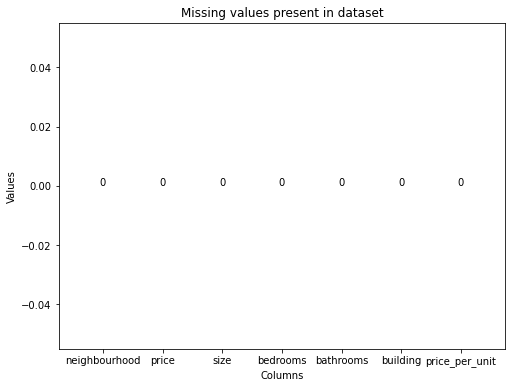

In [17]:
check_null_values(df)

#### **Data Transformation**: 

In [18]:
def plot_boxplots(df, features_to_scale):
  plt.rcParams["figure.figsize"] = [7.50, 5.50] 
  plt.rcParams["figure.autolayout"] = True
  df[features_to_scale].plot(kind='box', title='boxplot')
  plt.show()

def _scale_features(df, features_to_scale):
    # min_max scaler is a way to get data in the range 0 to 1
    # if you need -1 1 range, use StandardScaler
    min_max_scaler = MinMaxScaler()

    for feature in features_to_scale:
        df[[feature]] = min_max_scaler.fit_transform(df[[feature]])
    return df


--------------------------Before scaling-------------------------


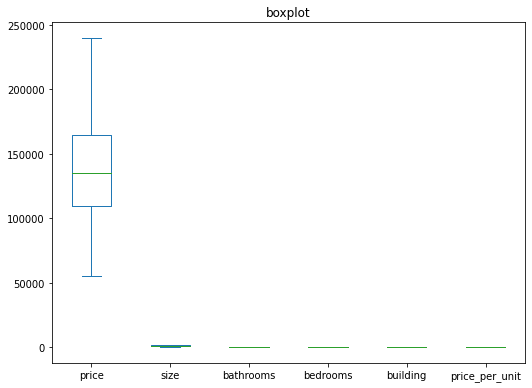



--------------------------After scaling-------------------------


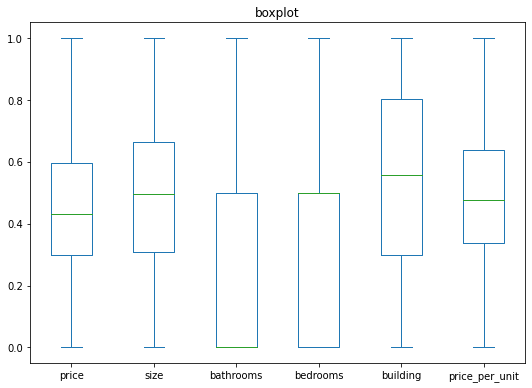

In [19]:
features_to_scale = ['price', 'size', 'bathrooms', 'bedrooms', 'building', 'price_per_unit']
print("\n--------------------------Before scaling-------------------------")
plot_boxplots(df, features_to_scale)

df = _scale_features(df, features_to_scale)

print("\n\n--------------------------After scaling-------------------------")
plot_boxplots(df, features_to_scale)

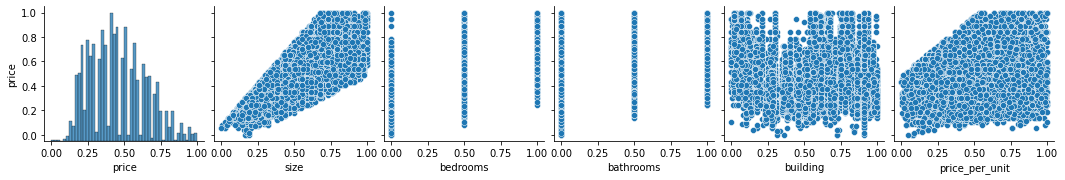

In [20]:
sns.pairplot(data=df, y_vars =['price'])

In [21]:
df.corr()

,price,size,bedrooms,bathrooms,building,price_per_unit
price,1.000000,0.805760,0.734635,0.594418,-0.027740,0.110364
size,0.805760,1.000000,0.826600,0.703239,0.023127,-0.477771
bedrooms,0.734635,0.826600,1.000000,0.732935,0.055450,-0.301579
bathrooms,0.594418,0.703239,0.732935,1.000000,0.043643,-0.282180
building,-0.027740,0.023127,0.055450,0.043643,1.000000,-0.073382
price_per_unit,0.110364,-0.477771,-0.301579,-0.282180,-0.073382,1.000000


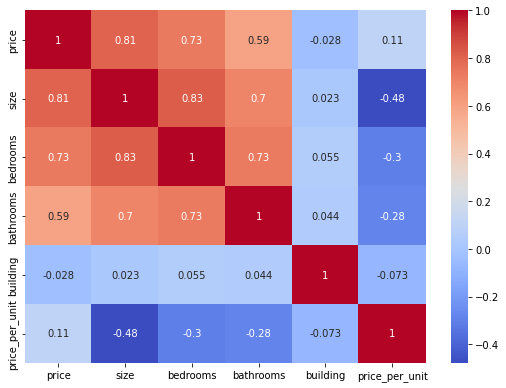

In [22]:
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm')

#### **Label encoding categorical values**: 

In [23]:
def one_hot_encode_feature(df, feature):
  """Encodes categorical values into numerical values
  
  Args:
  df: Dataframe
  feature: column with categorical values
  
  Returns:
  df: Returns dataframe with one hot encoded column 
  """
  
  dummy_feature= pd.get_dummies(df[feature])
  df = pd.merge(
    left=df,
    right=dummy_feature,
    left_index=True,
    right_index=True,
    )
  return df

In [24]:
df = one_hot_encode_feature(df, feature="neighbourhood")

#### **Memory Optimization**: 

In [25]:
def reduce_memory(df):
    memory_before = df.memory_usage().sum()
    df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
    df.index = df.index.astype('int32')
    print("\nMemory usage reduced in percentage: \n", (memory_before - df.memory_usage().sum())/memory_before * 100)
    
    return df

In [26]:
# Downcasting datatypes since all values are from 0 to 1
df = reduce_memory(df)


Memory usage reduced in percentage: 
 60.48183834490782


# **2. Training and Evaluation**


#### **Splitting dataset into train and test**: 

In [27]:
X = df.drop(['neighbourhood','price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18957, 8), (6319, 8), (18957,), (6319,))

#### **Training**: 

In [35]:
def train_model(model):
  """
  Trains model passed 
  Args:
  model: model to be trained

  Returns:
  model: Trained model
  train_time: Time taken for training process
  """

  start = time()
  model.fit(X_train, y_train)
  end = time()
  train_time = end-start

  return model, train_time
  

# Linear Regression
lr_model = LinearRegression()
lr_model, train_time_lr = train_model(lr_model)

# Random Forest Regressor
random_regr = RandomForestRegressor(n_estimators=400,random_state=0)
random_regr, train_time_rand = train_model(random_regr)

# Gradient Boosting Regressor
gradient_regr = GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1)
gradient_regr, train_time_grad = train_model(gradient_regr)

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree, train_time_dec = train_model(decision_tree)

# Ada Boost Regressor
ada = AdaBoostRegressor(n_estimators=400, learning_rate=0.2,loss='exponential')
ada, train_time_ada = train_model(ada)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


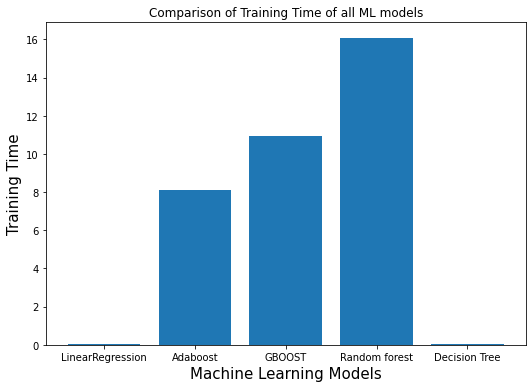

In [29]:
# Plotting time used for training by each model
model = ['LinearRegression', 'Adaboost', 'GBOOST', 'Random forest', 'Decision Tree']
Train_Time = [
    train_time_lr,
    train_time_ada,
    train_time_grad,
    train_time_rand,
    train_time_dec
    
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

#### **Evaluation**: 

In [30]:
def evaluate_model(model, X, y_true):
  """
  Evaluates regressor model using r2 score, adj_r2_score, mae, mse, and rmse
  Args:
  model: Model to be evaluated
  X: Feature columns
  y_true: Target column
  
  Returns:
  score, y_pred, exp_var_score, r2_score, adj_r2_score, mae, mse, rmse
  """

  score = model.score(X, y_true)
  y_pred = model.predict(X)
  exp_var_score = explained_variance_score(y_true, y_pred)

  r2_score = metrics.r2_score(y_true, y_pred)
  adj_r2_score = 1 - (1 - metrics.r2_score(y_true, y_pred)) * (len(y_true) - 1)/(len(y_true) - X.shape[1] - 1)
  mae = metrics.mean_absolute_error(y_true, y_pred)
  mse = metrics.mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))

  return score, y_pred, exp_var_score, r2_score, adj_r2_score, mae, mse, rmse


X = X_test
y = y_test
score_lr, y_pred_lr, exp_var_score_lr, r2_score_lr, adj_r2_score_lr, mae_lr, mse_lr, rmse_lr = evaluate_model(lr_model, X, y)

score_rand, y_pred_rand, exp_var_score_rand, r2_score_rand, adj_r2_score_rand, mae_rand, mse_rand, rmse_rand = evaluate_model(random_regr, X, y)

score_gbr, y_pred_gbr, exp_var_score_gbr, r2_score_gbr, adj_r2_score_gbr, mae_gbr, mse_gbr, rmse_gbr = evaluate_model(gradient_regr, X, y)

score_dtr, y_pred_dtr, exp_var_score_dtr, r2_score_dtr, adj_r2_score_dtr, mae_dtr, mse_dtr, rmse_dtr = evaluate_model(decision_tree, X, y)

score_abr, y_pred_abr, exp_var_score_abr, r2_score_abr, adj_r2_score_abr, mae_abr, mse_abr, rmse_abr = evaluate_model(ada, X, y)



In [31]:
models_cross = pd.DataFrame({
    'Metric': ['exp_var_score', 'r2_score', 'adj_r2_score', 'mae', 'mse', 'rmse'],
     'Linear Regression': [exp_var_score_lr, r2_score_lr, adj_r2_score_lr, mae_lr, mse_lr, rmse_lr],
     'RandomForest' : [exp_var_score_rand, r2_score_rand, adj_r2_score_rand, mae_rand, mse_rand, rmse_rand],
     'GradientBoost' : [exp_var_score_gbr, r2_score_gbr, adj_r2_score_gbr, mae_gbr, mse_gbr, rmse_gbr],
     'DecisionTree' : [exp_var_score_dtr, r2_score_dtr, adj_r2_score_dtr, mae_dtr, mse_dtr, rmse_dtr],
     'AdaBoost' : [exp_var_score_abr, r2_score_abr, adj_r2_score_abr, mae_abr, mse_abr, rmse_abr]
     })

models_cross = models_cross.set_index('Metric')
models_cross = models_cross.T
models_cross.sort_values(by='r2_score', ascending=False)

Metric,exp_var_score,r2_score,adj_r2_score,mae,mse,rmse
RandomForest,0.999864,0.999864,0.999864,0.000950,0.000005,0.002254
GradientBoost,0.999737,0.999737,0.999737,0.002170,0.000010,0.003130
DecisionTree,0.999447,0.999447,0.999446,0.001246,0.000021,0.004543
Linear Regression,0.967894,0.967893,0.967852,0.025891,0.001198,0.034613
AdaBoost,0.936627,0.929315,0.929225,0.043031,0.002638,0.051357


# **Random Forest Regressor works best for this dataset!**

In [32]:
# Checking metrics for train dataset

X = X_train
y = y_train

score_rand, y_pred_rand, exp_var_score_rand, r2_score_rand, adj_r2_score_rand, mae_rand, mse_rand, rmse_rand = evaluate_model(random_regr, X, y)
print(exp_var_score_rand, r2_score_rand, adj_r2_score_rand, mae_rand, mse_rand, rmse_rand)

0.9999792396062042 0.9999792367499033 0.9999792279834899 0.0003732534483415388 7.662199715834486e-07 0.0008753399177367891


<br>
<br>
<br>
<br>